## Denoising Autoencoder transformation (encode)

Considering a dataset with $p$ numerical attributes. 

The goal of the autoencoder is to reduce the dimension of $p$ to $k$, such that these $k$ attributes are enough to recompose the original $p$ attributes. 

In [1]:
# DAL ToolBox
# version 1.1.727

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")
load_library("ggplot2")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: ggplot2



### dataset for example 

In [2]:
data(sin_data)

sw_size <- 5
ts <- ts_data(sin_data$y, sw_size)

ts_head(ts)


t4,t3,t2,t1,t0
0.0000000,0.2474040,0.4794255,0.6816388,0.8414710
0.2474040,0.4794255,0.6816388,0.8414710,0.9489846
0.4794255,0.6816388,0.8414710,0.9489846,0.9974950
0.6816388,0.8414710,0.9489846,0.9974950,0.9839859
0.8414710,0.9489846,0.9974950,0.9839859,0.9092974
0.9489846,0.9974950,0.9839859,0.9092974,0.7780732


### applying data normalization

In [3]:
preproc <- ts_norm_gminmax()
preproc <- fit(preproc, ts)
ts <- transform(preproc, ts)

ts_head(ts)

t4,t3,t2,t1,t0
0.5004502,0.6243512,0.7405486,0.8418178,0.9218625
0.6243512,0.7405486,0.8418178,0.9218625,0.9757058
0.7405486,0.8418178,0.9218625,0.9757058,1.0000000
0.8418178,0.9218625,0.9757058,1.0000000,0.9932346
0.9218625,0.9757058,1.0000000,0.9932346,0.9558303
0.9757058,1.0000000,0.9932346,0.9558303,0.8901126


### spliting into training and test

In [4]:
samp <- ts_sample(ts, test_size = 10)
train <- as.data.frame(samp$train)
test <- as.data.frame(samp$test)

### creating autoencoder
Reduce from 5 to 3 dimensions

In [5]:
auto <- lae_encode(5, 3, num_epochs=1500)

auto <- fit(auto, train)

### learning curves

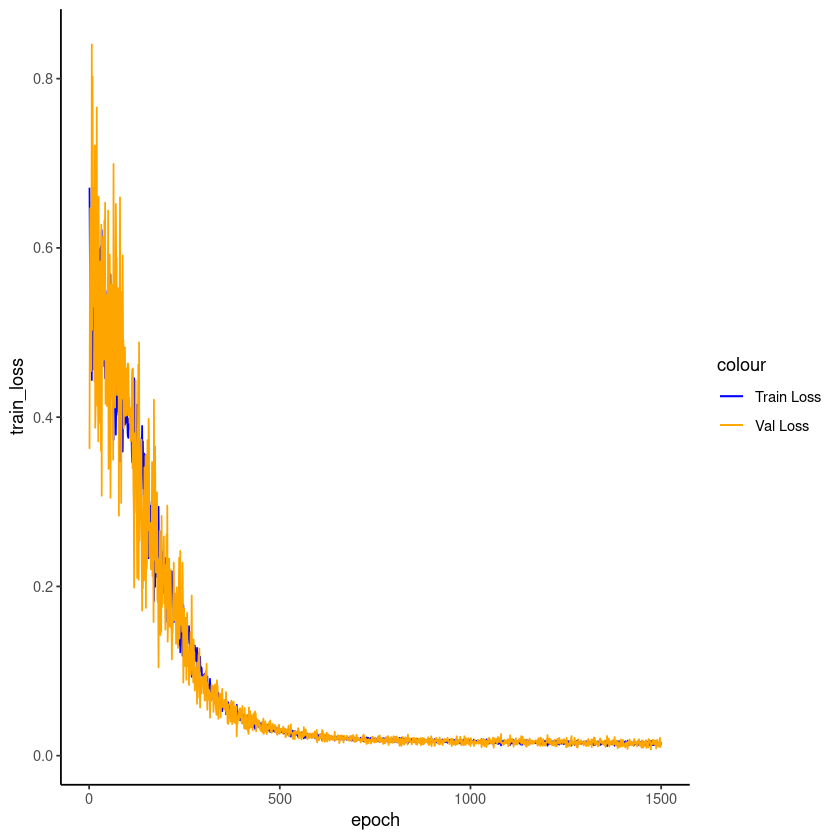

In [6]:
train_loss <- unlist(auto$model$train_loss)
val_loss <- unlist(auto$model$val_loss)

fit_loss <- as.data.frame(cbind(train_loss, val_loss))
fit_loss['epoch'] <- 1:nrow(fit_loss)

ggplot(fit_loss, aes(x=epoch)) +
geom_line(aes(y=train_loss, colour='Train Loss')) +
geom_line(aes(y=val_loss, colour='Val Loss')) +
scale_color_manual(values=c('Blue','Orange')) +
theme_classic()

### testing autoencoder
presenting the original test set and display encoding

In [7]:
print(head(test))
result <- transform(auto, test)
print(head(result))

         t4        t3        t2        t1        t0
1 0.7258342 0.8294719 0.9126527 0.9702046 0.9985496
2 0.8294719 0.9126527 0.9702046 0.9985496 0.9959251
3 0.9126527 0.9702046 0.9985496 0.9959251 0.9624944
4 0.9702046 0.9985496 0.9959251 0.9624944 0.9003360
5 0.9985496 0.9959251 0.9624944 0.9003360 0.8133146
6 0.9959251 0.9624944 0.9003360 0.8133146 0.7068409
           [,1]       [,2]       [,3]
[1,] -0.7489486 -0.2712132 -0.8206643
[2,] -0.7550221 -0.4156070 -0.8443255
[3,] -0.7464885 -0.4897172 -0.8570342
[4,] -0.7220110 -0.5053425 -0.8607950
[5,] -0.6790852 -0.4672863 -0.8565702
[6,] -0.6162998 -0.3662445 -0.8436033
